# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model

### Load the dataset

In [2]:
df = pd.read_csv('boston.csv')

### Check the shape of the dataset

In [3]:
df.shape

(506, 13)

### Get the info regarding column datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

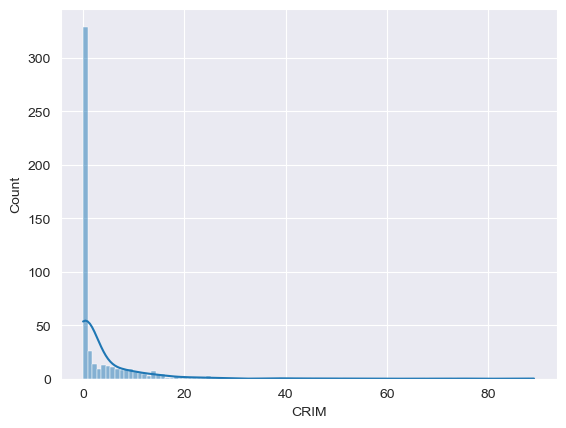

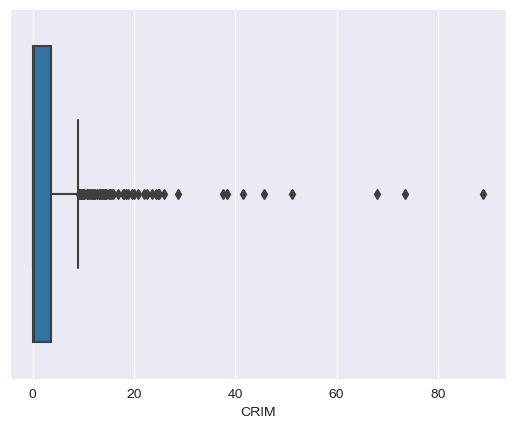

In [12]:
sns.histplot(data=df, x='CRIM', kde=True)
plt.show()
sns.boxplot(data=df, x='CRIM')
plt.show()

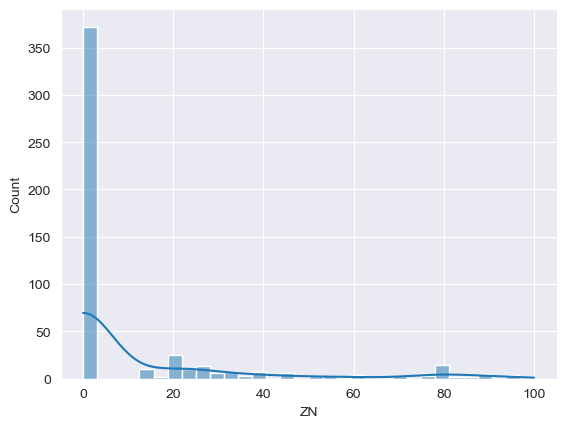

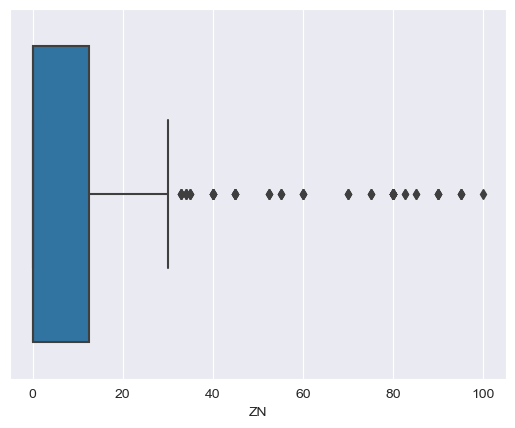

In [13]:
sns.histplot(data=df, x='ZN', kde=True)
plt.show()
sns.boxplot(data=df, x='ZN')
plt.show()

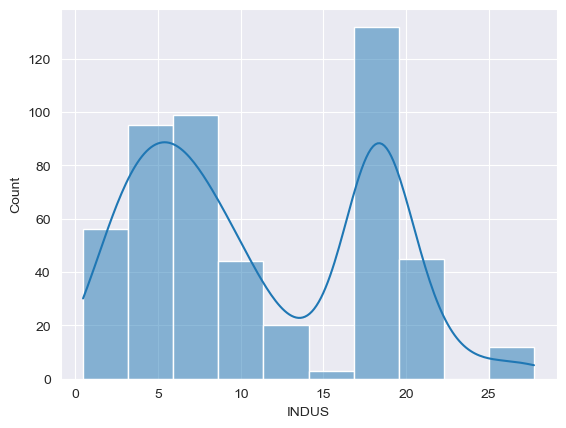

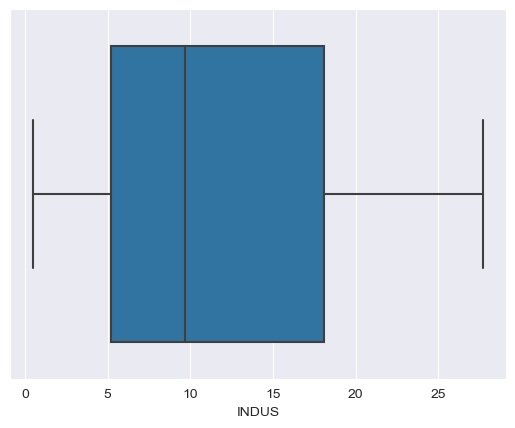

In [14]:
sns.histplot(data=df, x='INDUS', kde=True)
plt.show()
sns.boxplot(data=df, x='INDUS')
plt.show()

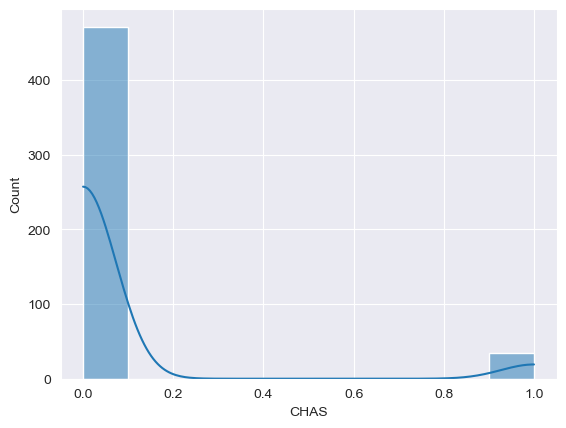

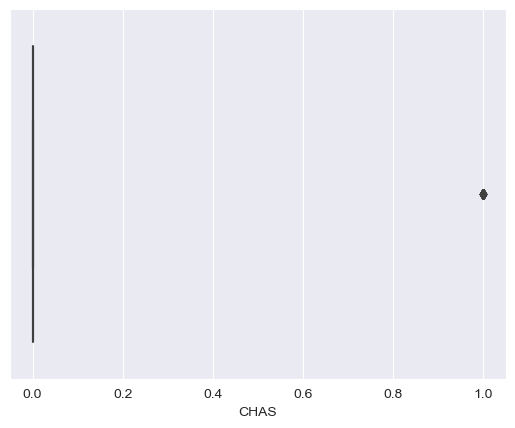

In [15]:
sns.histplot(data=df, x='CHAS', kde=True)
plt.show()
sns.boxplot(data=df, x='CHAS')
plt.show()

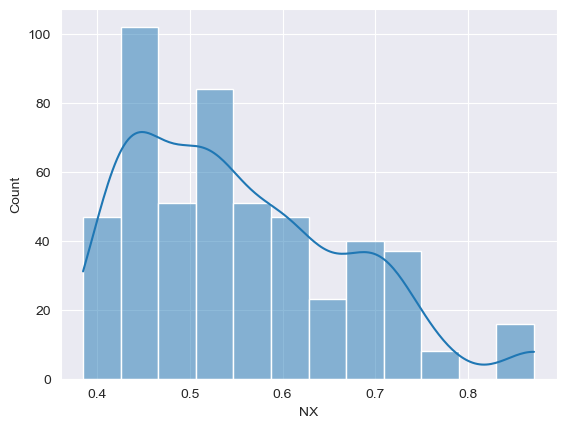

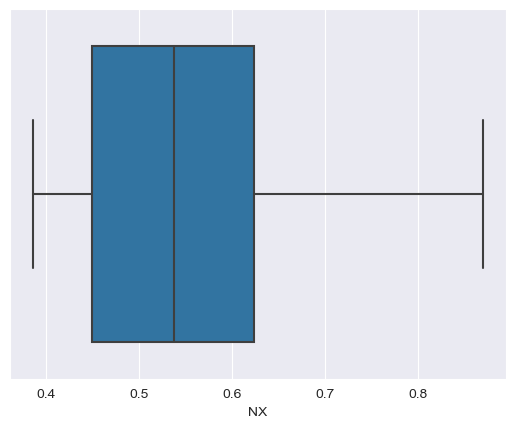

In [17]:
sns.histplot(data=df, x='NX', kde=True)
plt.show()
sns.boxplot(data=df, x='NX')
plt.show()

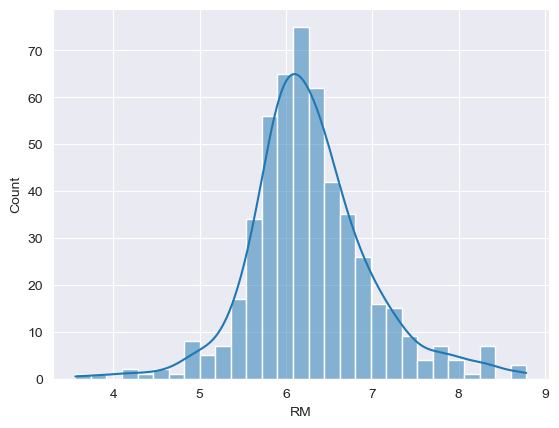

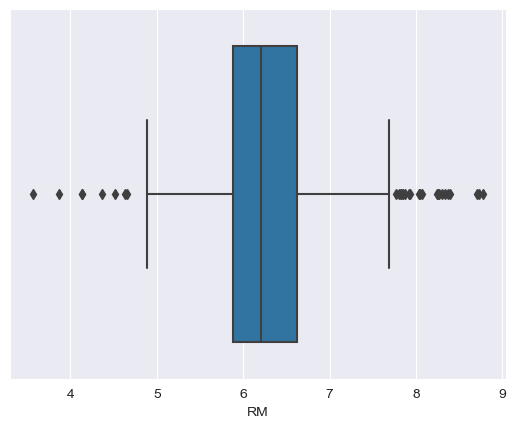

In [18]:
sns.histplot(data=df, x='RM', kde=True)
plt.show()
sns.boxplot(data=df, x='RM')
plt.show()

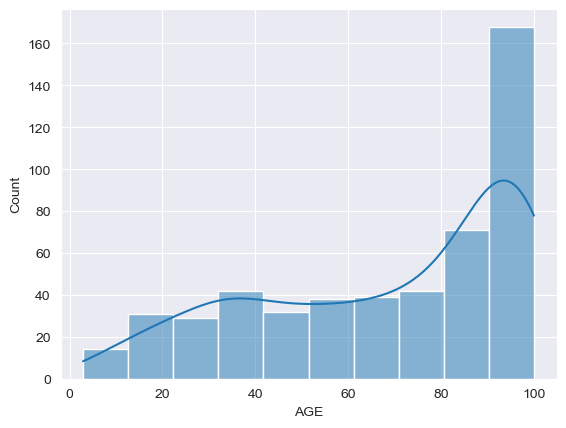

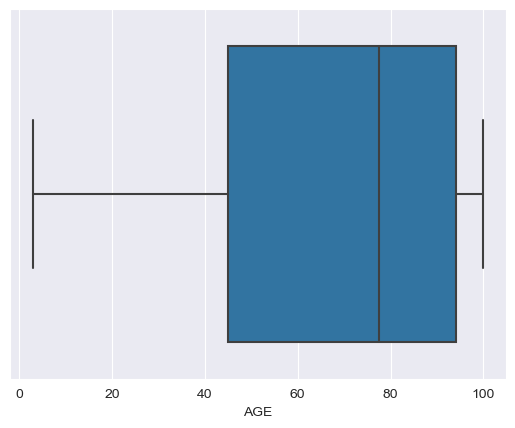

In [19]:
sns.histplot(data=df, x='AGE', kde=True)
plt.show()
sns.boxplot(data=df, x='AGE')
plt.show()

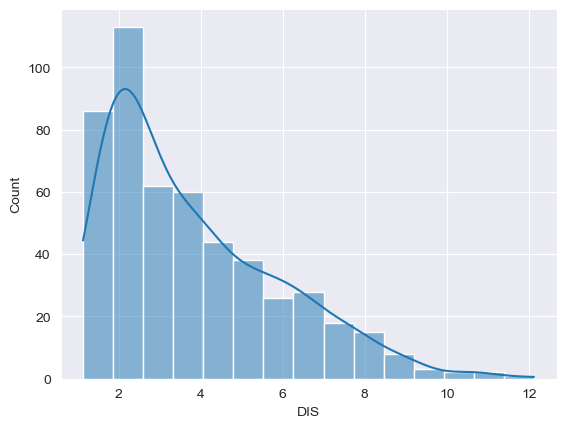

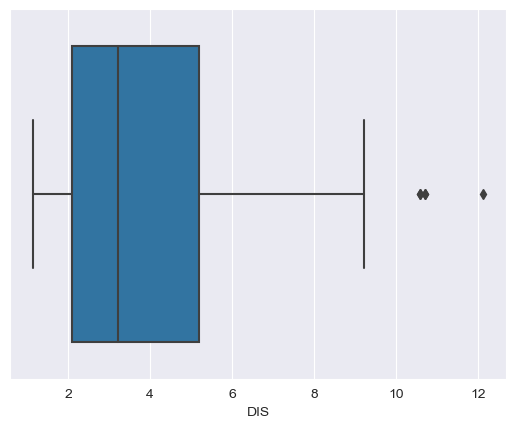

In [20]:
sns.histplot(data=df, x='DIS', kde=True)
plt.show()
sns.boxplot(data=df, x='DIS')
plt.show()

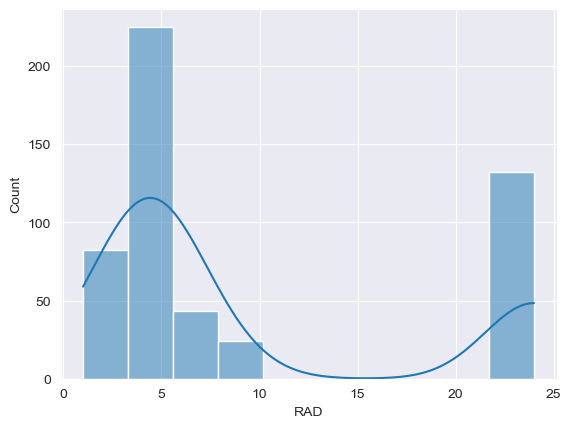

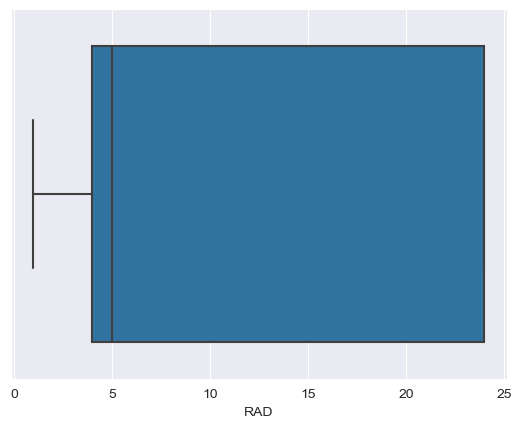

In [21]:
sns.histplot(data=df, x='RAD', kde=True)
plt.show()
sns.boxplot(data=df, x='RAD')
plt.show()

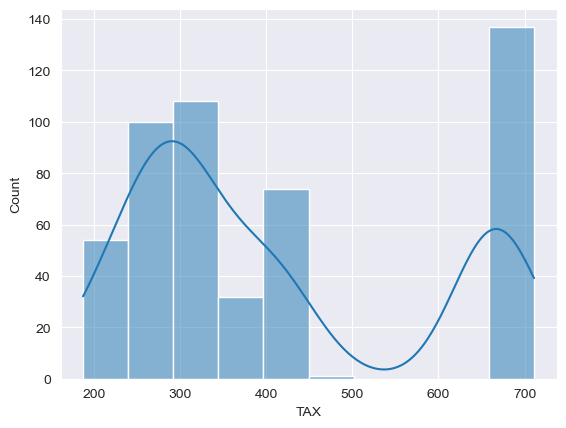

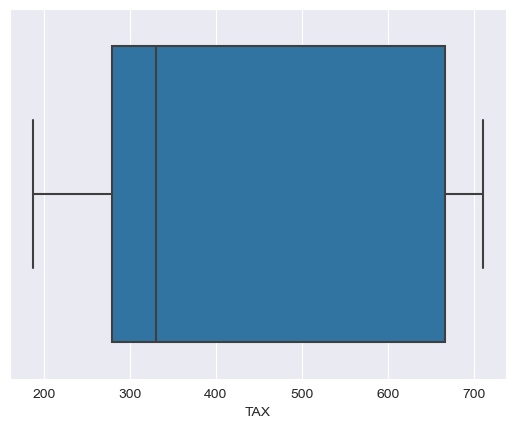

In [22]:
sns.histplot(data=df, x='TAX', kde=True)
plt.show()
sns.boxplot(data=df, x='TAX')
plt.show()

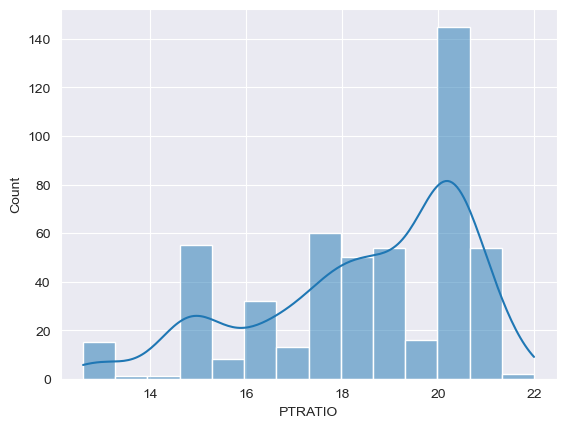

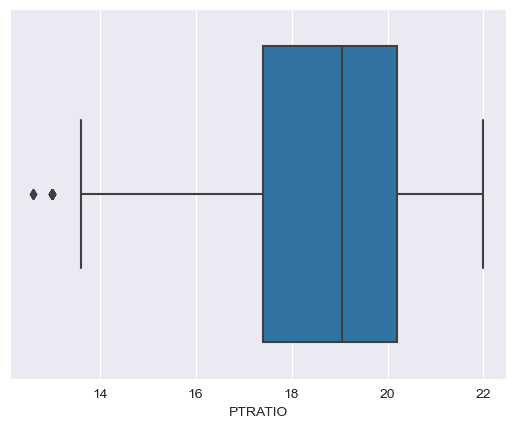

In [23]:
sns.histplot(data=df, x='PTRATIO', kde=True)
plt.show()
sns.boxplot(data=df, x='PTRATIO')
plt.show()

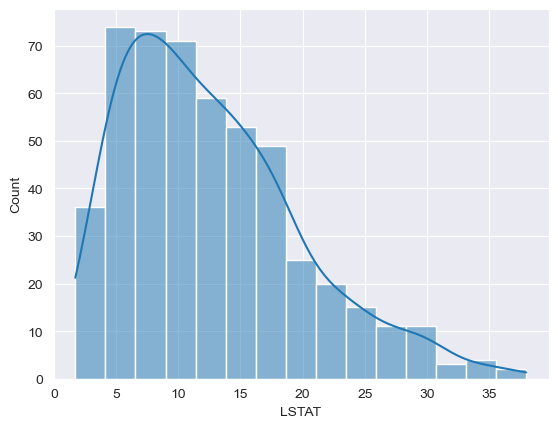

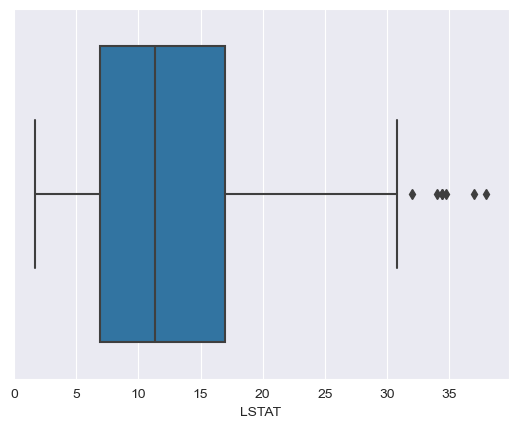

In [24]:
sns.histplot(data=df, x='LSTAT', kde=True)
plt.show()
sns.boxplot(data=df, x='LSTAT')
plt.show()

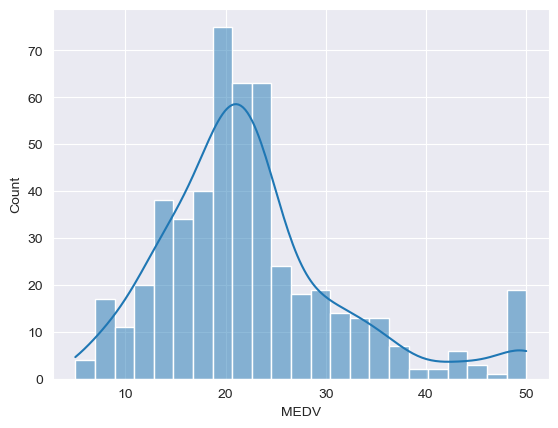

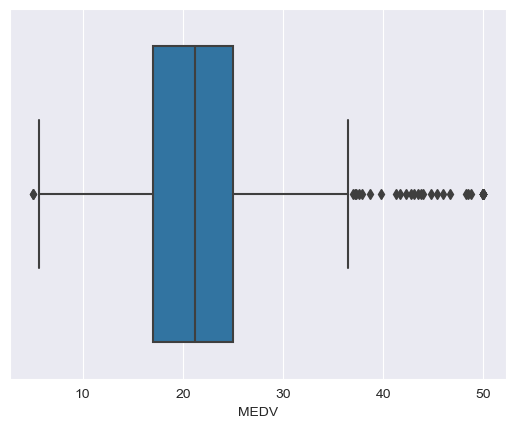

In [25]:
sns.histplot(data=df, x='MEDV', kde=True)
plt.show()
sns.boxplot(data=df, x='MEDV')
plt.show()

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

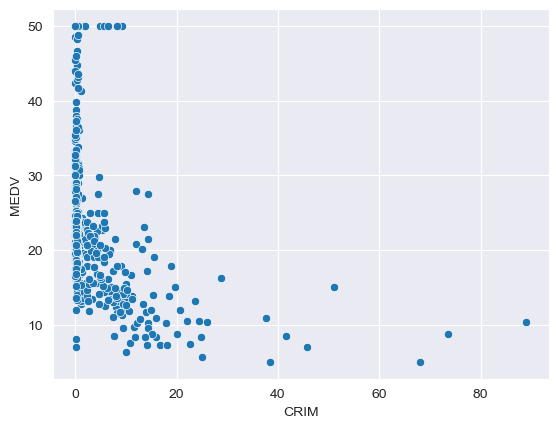

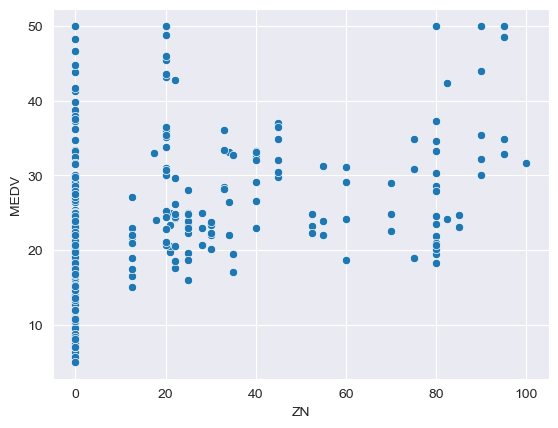

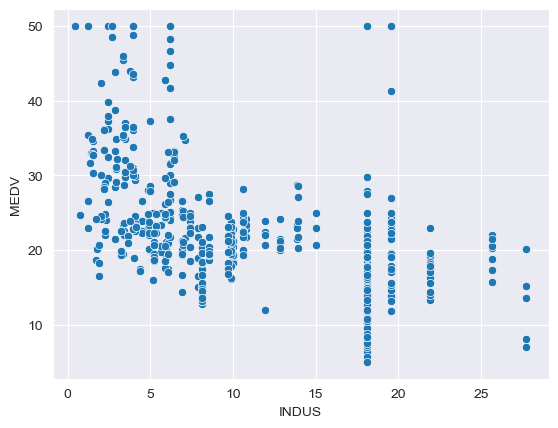

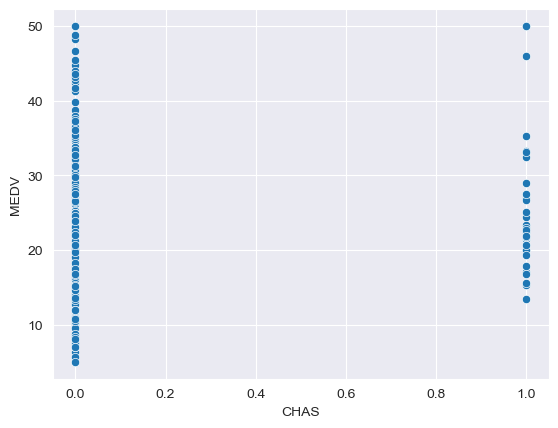

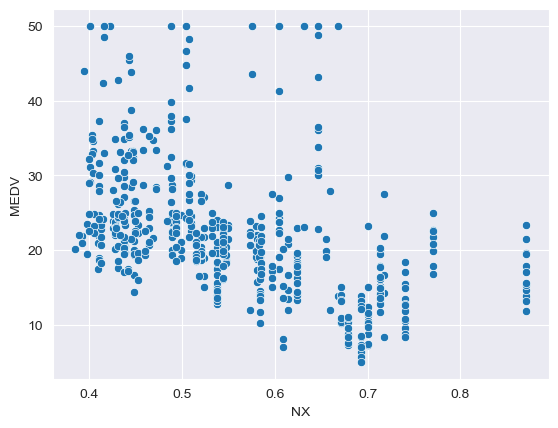

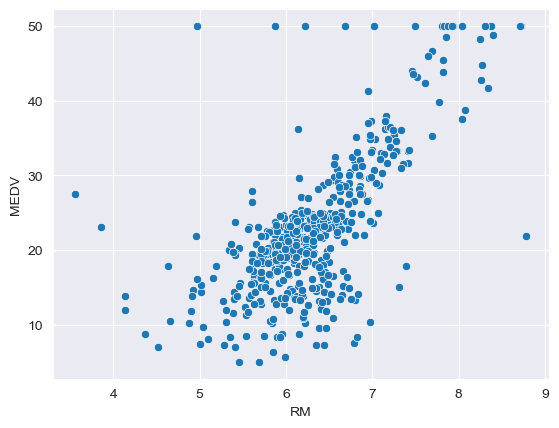

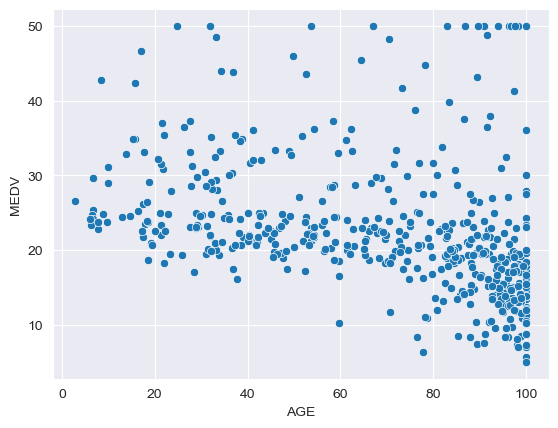

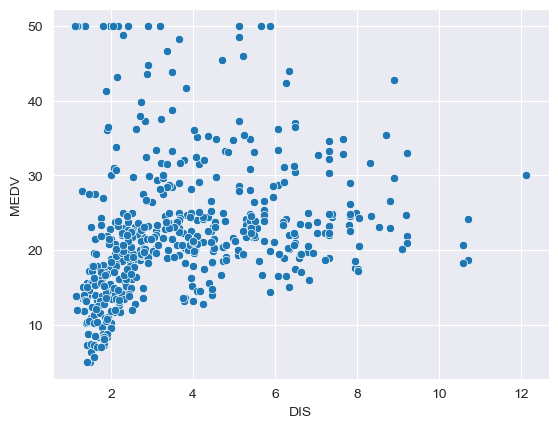

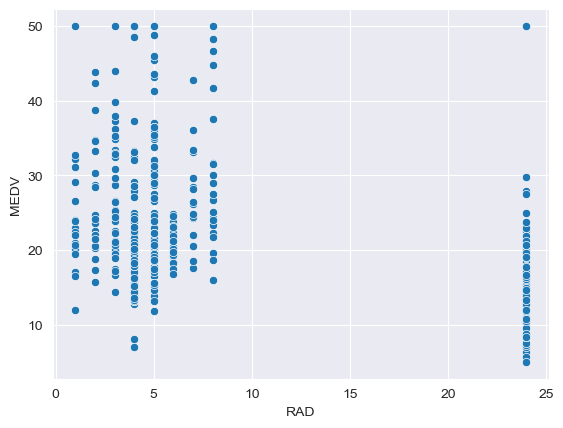

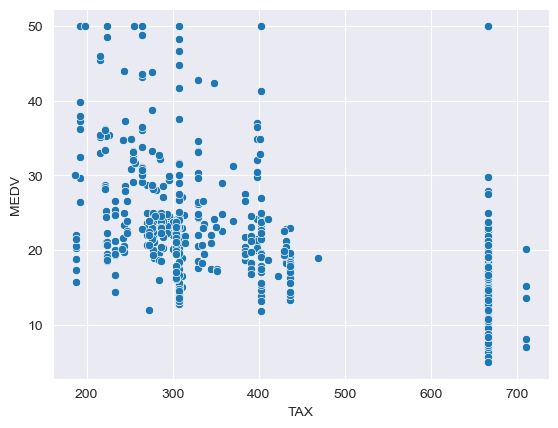

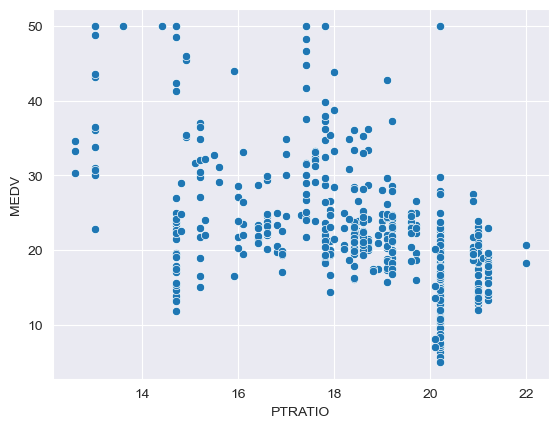

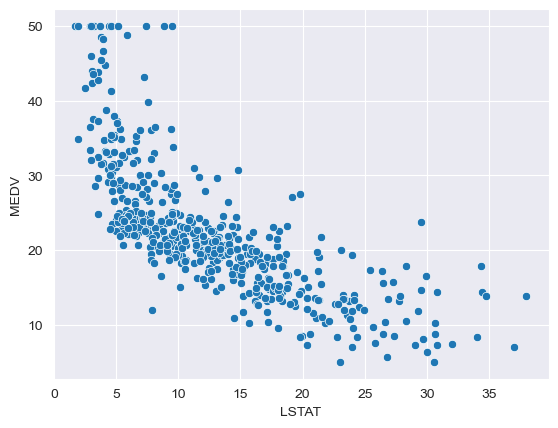

In [28]:
for col in df.columns:
    if col != 'MEDV':
        sns.scatterplot(data=df, x=col, y='MEDV')
        plt.show()

**Plot the correlation heatmap and list your observations.**

<Axes: >

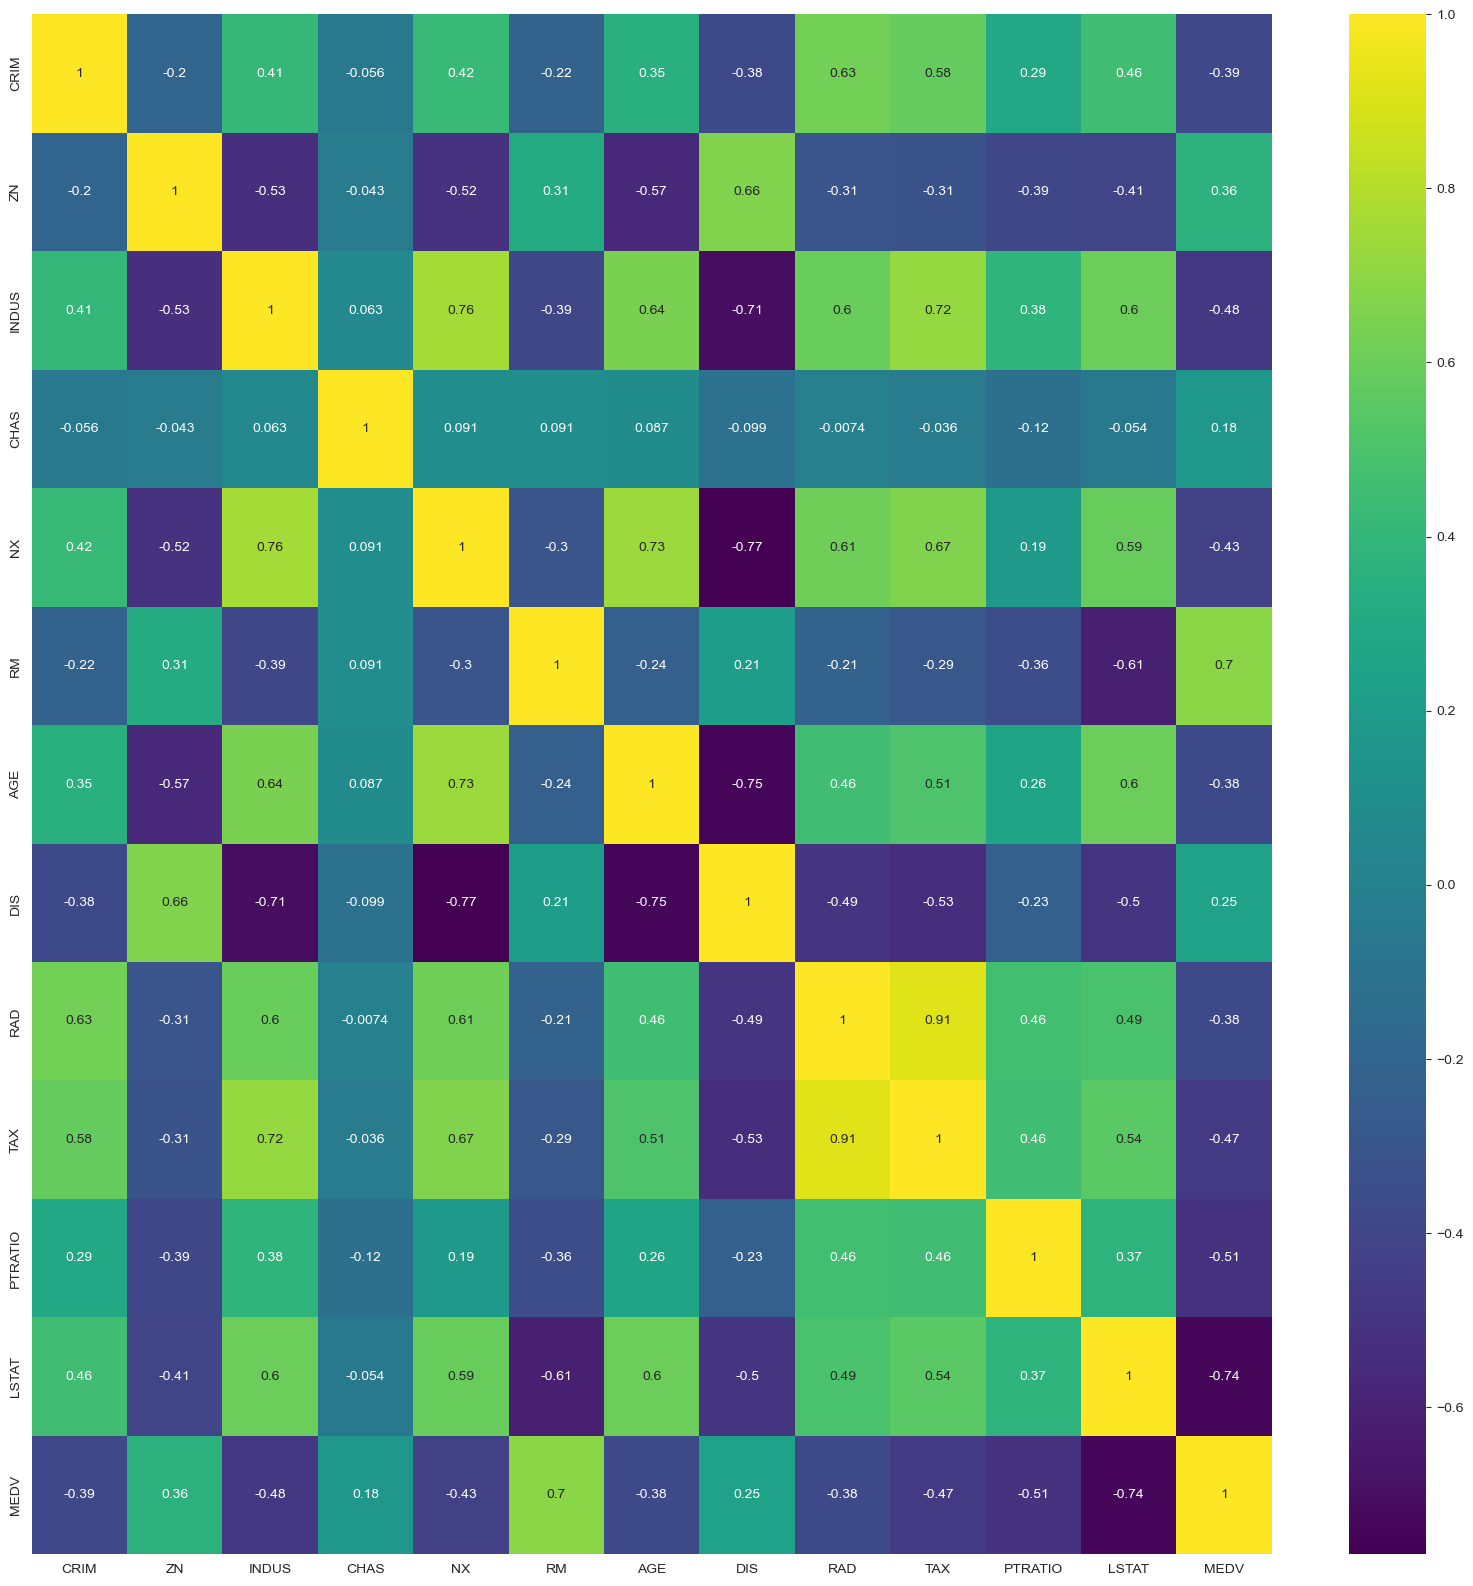

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

### Model Building

**Fit the model to the training set**

**Get the score on training set**

**Write your own function for the R-squared score.**

**Get the score on test set**

**Get the RMSE on test set**

**Get the model coefficients.**

**Automate the equation of the fit**